Load Cleaned Data

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("darkgrid")

# Define cleaned data path
CLEANED_DATA_PATH = "../data/cleaned/"

# List available cleaned files
available_files = os.listdir(CLEANED_DATA_PATH)
print("Available Cleaned Data Files:", available_files)

# Load cleaned datasets
file_names = [
    "circuits_cleaned.csv", "constructor_results_cleaned.csv",
    "constructor_standings_cleaned.csv", "constructors_cleaned.csv",
    "driver_standings_cleaned.csv", "drivers_cleaned.csv",
    "lap_times_cleaned.csv", "pit_stops_cleaned.csv",
    "qualifying_cleaned.csv", "races_cleaned.csv",
    "results_cleaned.csv", "seasons_cleaned.csv",
    "sprint_results_cleaned.csv", "status_cleaned.csv"
]

# Load datasets into a dictionary
dataframes = {}
for file in file_names:
    file_path = os.path.join(CLEANED_DATA_PATH, file)
    if os.path.exists(file_path):
        df_name = file.replace("_cleaned.csv", "")
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"✅ Loaded {df_name} dataset with shape {dataframes[df_name].shape}")
    else:
        print(f"⚠️ Warning: {file} not found!")

# Show first few rows of key datasets
dataframes['races'].head(), dataframes['drivers'].head(), dataframes['results'].head()


Available Cleaned Data Files: ['circuits_cleaned.csv', 'constructors_cleaned.csv', 'constructor_results_cleaned.csv', 'constructor_standings_cleaned.csv', 'drivers_cleaned.csv', 'driver_standings_cleaned.csv', 'lap_times_cleaned.csv', 'pit_stops_cleaned.csv', 'qualifying_cleaned.csv', 'races_cleaned.csv', 'results_cleaned.csv', 'seasons_cleaned.csv', 'sprint_results_cleaned.csv', 'status_cleaned.csv']
✅ Loaded circuits dataset with shape (77, 9)
✅ Loaded constructor_results dataset with shape (12625, 5)
✅ Loaded constructor_standings dataset with shape (13391, 7)
✅ Loaded constructors dataset with shape (212, 5)
✅ Loaded driver_standings dataset with shape (34863, 7)
✅ Loaded drivers dataset with shape (861, 9)
✅ Loaded lap_times dataset with shape (589081, 6)
✅ Loaded pit_stops dataset with shape (11371, 7)
✅ Loaded qualifying dataset with shape (10494, 9)
✅ Loaded races dataset with shape (1125, 18)
✅ Loaded results dataset with shape (26759, 18)
✅ Loaded seasons dataset with shape (

(   raceId  year  round  circuitId                   name        date  \
 0       1  2009      1          1  Australian Grand Prix  2009-03-29   
 1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
 2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
 3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
 4       5  2009      5          4     Spanish Grand Prix  2009-05-10   
 
        time                                                url fp1_date  \
 0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
 1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
 2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
 3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
 4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   
 
   fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
 0       \N       \N       \N

Perform Summary Statistics

In [3]:
# Summary statistics of race results
dataframes['results'].describe()


,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000
mean,13380.977391,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,46.301768,17.224971
std,7726.134642,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,29.496557,26.026104
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6690.500000,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000
50%,13380.000000,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,20069.500000,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26764.000000,1144.000000,862.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000


Checking missing values

In [4]:
# Check missing values in all datasets
missing_values = {name: df.isnull().sum().sum() for name, df in dataframes.items()}
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Dataset', 'Missing Values'])
missing_values_df.sort_values(by="Missing Values", ascending=False)


,Dataset,Missing Values
0,circuits,0
1,constructor_results,0
2,constructor_standings,0
3,constructors,0
4,driver_standings,0
5,drivers,0
6,lap_times,0
7,pit_stops,0
8,qualifying,0
9,races,0


Relationship Between Starting Grid Position & Final Race Position

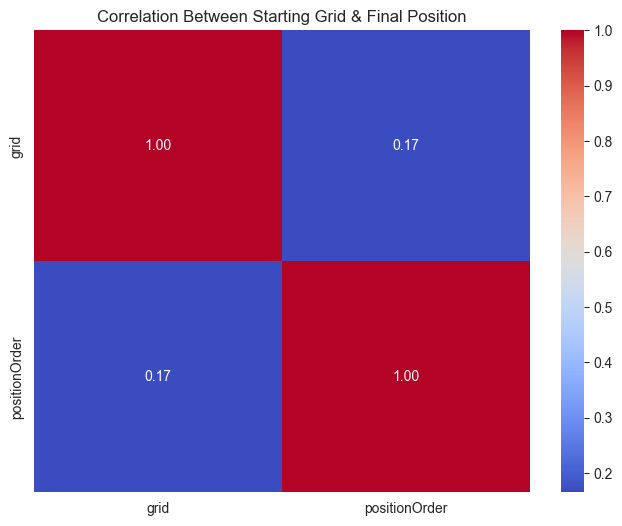

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
heatmap_data = dataframes['results'][['grid', 'positionOrder']].corr()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Starting Grid & Final Position")
plt.show()


Top 10 Drivers with the Most Wins

In [6]:
top_drivers = dataframes['driver_standings'].groupby("driverId")["wins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="magma")
plt.title("Top 10 Drivers by Total Wins")
plt.xlabel("Total Wins")
plt.ylabel("Driver ID")

# Add annotations
for i, v in enumerate(top_drivers.values):
    ax.text(v + 2, i, str(v), color='black', va='center')

plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_28868\3171589474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="magma")


Constructor (Team) Dominance Over Time

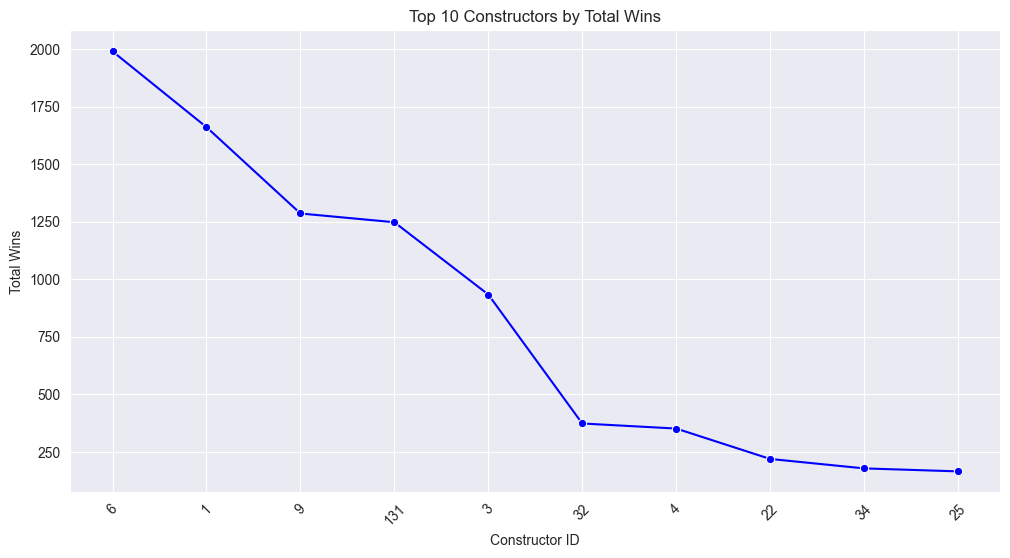

In [7]:
import numpy as np

constructor_wins = dataframes['constructor_standings'].groupby(["constructorId"])["wins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(x=np.arange(len(constructor_wins)), y=constructor_wins.values, marker="o", color="blue")
plt.xticks(np.arange(len(constructor_wins)), constructor_wins.index, rotation=45)
plt.title("Top 10 Constructors by Total Wins")
plt.xlabel("Constructor ID")
plt.ylabel("Total Wins")
plt.show()


Fastest Drivers Based on Average Lap Time

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\3479420904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=sampled_lap_times["driverId"], y=sampled_lap_times["milliseconds"], palette="viridis", alpha=0.5)
d:\F1_RacePrediction\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\F1_RacePrediction\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\F1_RacePrediction\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use strippl

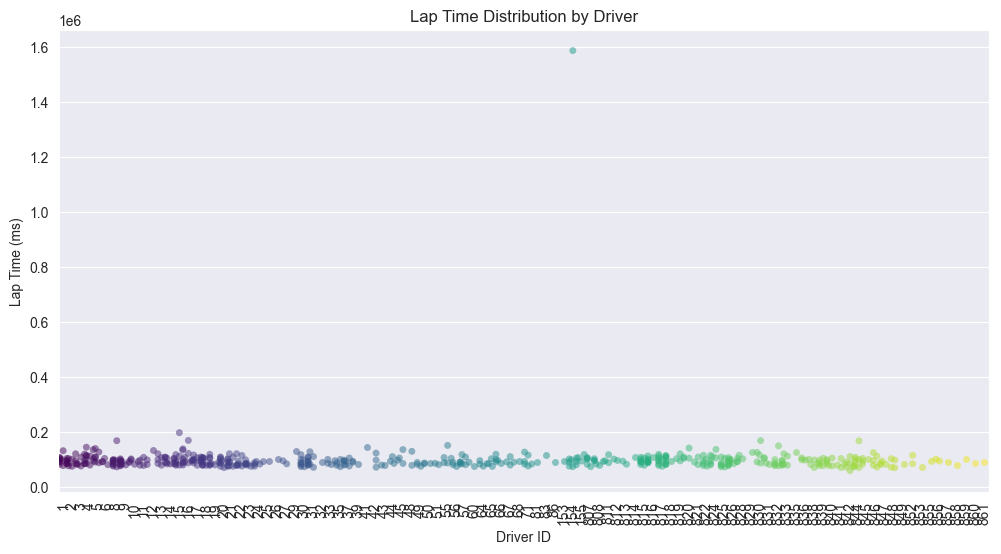

In [8]:
# Convert lap times to numeric format
dataframes['lap_times']['milliseconds'] = pd.to_numeric(dataframes['lap_times']['milliseconds'], errors='coerce')

# Get 500 random lap times for better visualization
sampled_lap_times = dataframes['lap_times'].sample(500)

plt.figure(figsize=(12, 6))
sns.swarmplot(x=sampled_lap_times["driverId"], y=sampled_lap_times["milliseconds"], palette="viridis", alpha=0.5)
plt.xticks(rotation=90)
plt.title("Lap Time Distribution by Driver")
plt.xlabel("Driver ID")
plt.ylabel("Lap Time (ms)")
plt.show()


Pit Stop Strategy Impact on Race Results

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\2922144009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframes['pit_stops']['stop'], y=dataframes['results']['positionOrder'], palette="coolwarm")


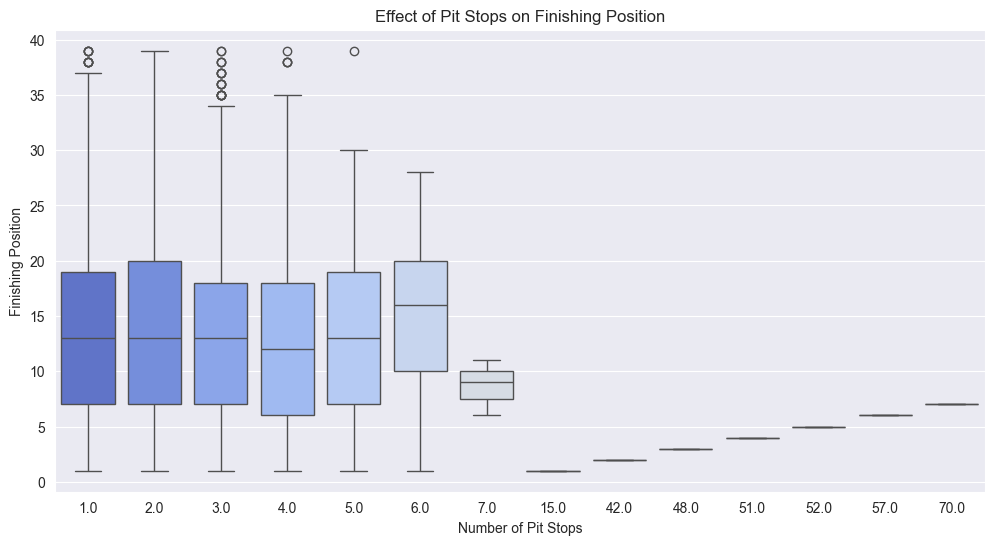

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataframes['pit_stops']['stop'], y=dataframes['results']['positionOrder'], palette="coolwarm")
plt.title("Effect of Pit Stops on Finishing Position")
plt.xlabel("Number of Pit Stops")
plt.ylabel("Finishing Position")
plt.show()


Top 10 Drivers by Total Points

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\1164517143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drivers.index, y=top_drivers.values, palette="coolwarm")


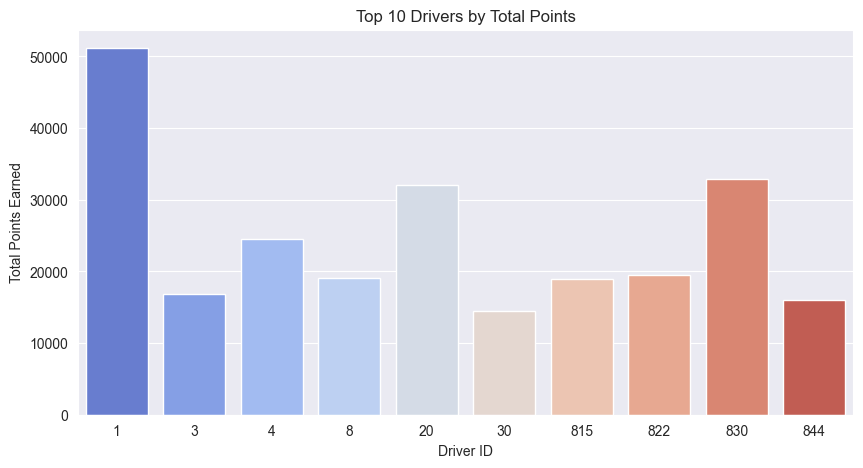

In [10]:
#Top drivers based on total points
top_drivers = dataframes['driver_standings'].groupby("driverId")["points"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_drivers.index, y=top_drivers.values, palette="coolwarm")
plt.title("Top 10 Drivers by Total Points")
plt.xlabel("Driver ID")
plt.ylabel("Total Points Earned")
plt.show()


Total Race Wins by Constructor

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\3484951218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_by_constructor.index, y=wins_by_constructor.values, palette="Blues_r")


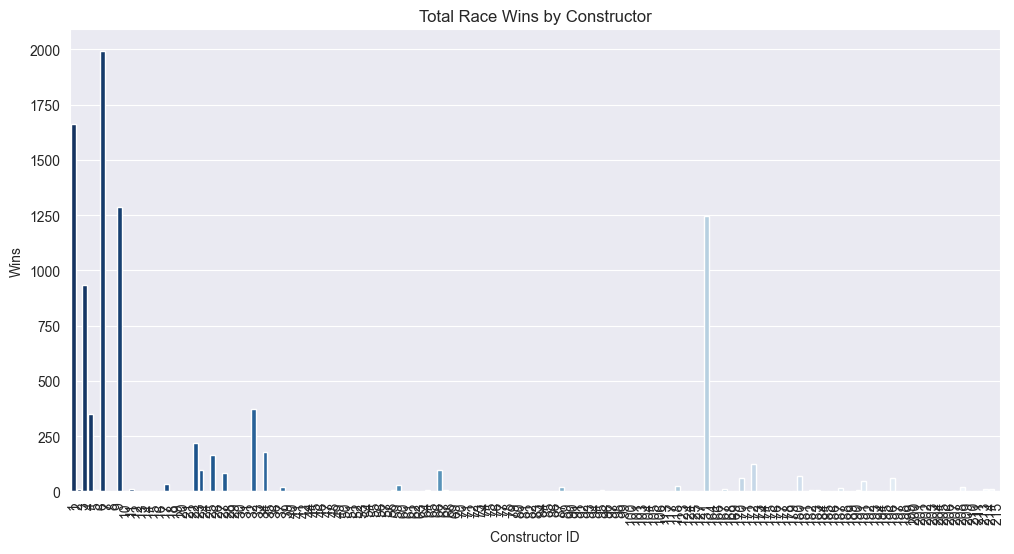

In [11]:
plt.figure(figsize=(12, 6))
wins_by_constructor = dataframes['constructor_standings'].groupby("constructorId")["wins"].sum().sort_values(ascending=False)
sns.barplot(x=wins_by_constructor.index, y=wins_by_constructor.values, palette="Blues_r")
plt.title("Total Race Wins by Constructor")
plt.xlabel("Constructor ID")
plt.ylabel("Wins")
plt.xticks(rotation=90)
plt.show()


Finishing Position vs. Qualifying Position

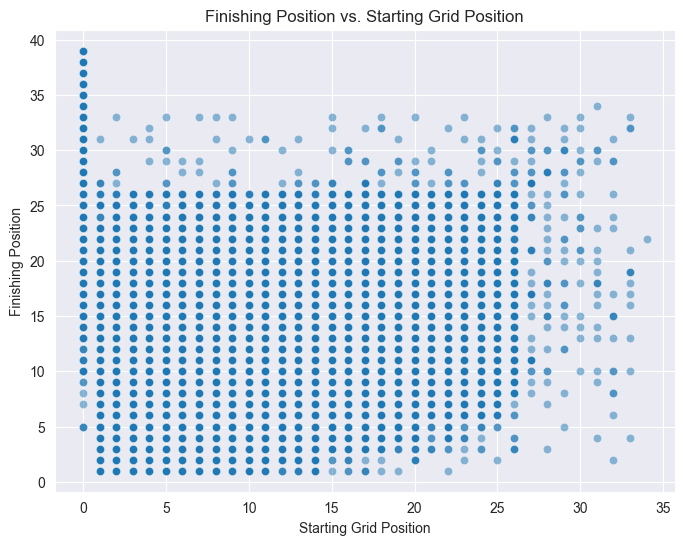

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataframes['results']['grid'], y=dataframes['results']['positionOrder'], alpha=0.5)
plt.title("Finishing Position vs. Starting Grid Position")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.show()


Top 10 Drivers by Wins

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\761615266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drivers.index, y=top_drivers.values, palette="magma")


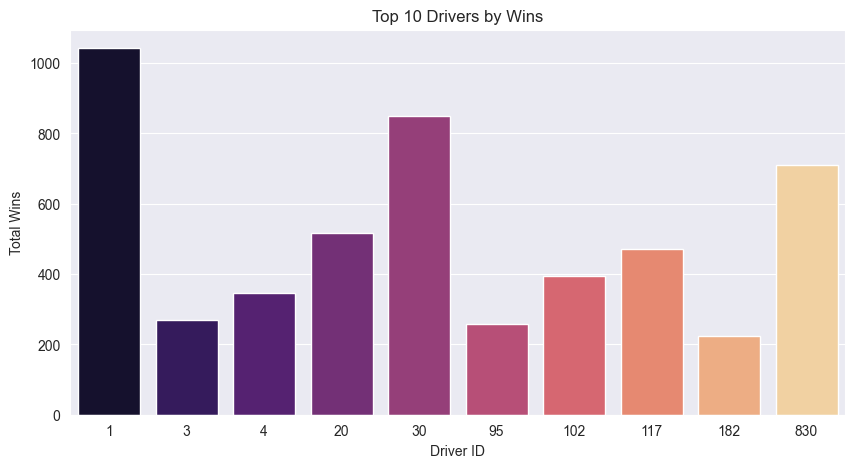

In [13]:
top_drivers = dataframes['driver_standings'].groupby("driverId")["wins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_drivers.index, y=top_drivers.values, palette="magma")
plt.title("Top 10 Drivers by Wins")
plt.xlabel("Driver ID")
plt.ylabel("Total Wins")
plt.show()


Constructor Dominance Over the Years

In [14]:
# Total race wins by constructor over time
# constructor_wins = dataframes['constructor_standings'].groupby("constructorId")["wins"].sum().sort_values(ascending=False).head(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=constructor_wins.index, y=constructor_wins.values, palette="viridis")
# plt.title("Top 10 Constructors by Total Wins")
# plt.xlabel("Constructor ID")
# plt.ylabel("Total Wins")
# plt.xticks(rotation=45)
# plt.show()


Relationship Between Qualifying Position & Race Finishing Position

In [15]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=dataframes['results']['grid'], y=dataframes['results']['positionOrder'], alpha=0.5)
# plt.title("Finishing Position vs. Starting Grid Position")
# plt.xlabel("Starting Grid Position")
# plt.ylabel("Finishing Position")
# plt.show()


Lap Times Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\1721706385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lap_times.index, y=avg_lap_times.values, palette="coolwarm")


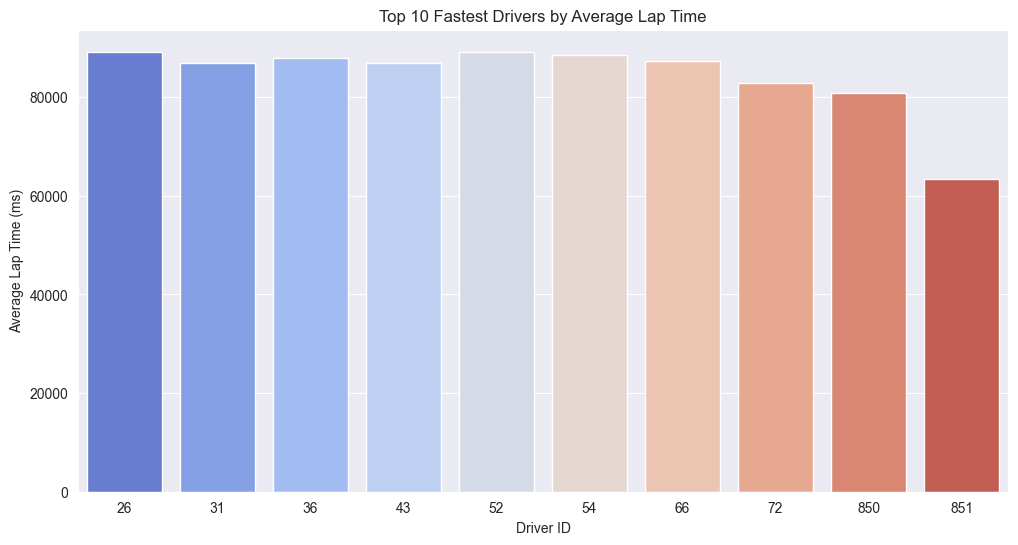

In [16]:
# Convert lap time to numeric format
dataframes['lap_times']['milliseconds'] = pd.to_numeric(dataframes['lap_times']['milliseconds'], errors='coerce')

# Average lap time per driver
avg_lap_times = dataframes['lap_times'].groupby("driverId")["milliseconds"].mean().sort_values().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_lap_times.index, y=avg_lap_times.values, palette="coolwarm")
plt.title("Top 10 Fastest Drivers by Average Lap Time")
plt.xlabel("Driver ID")
plt.ylabel("Average Lap Time (ms)")
plt.show()


 Pit Stop Strategy Impact

C:\Users\hp\AppData\Local\Temp\ipykernel_28868\2185799884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pit_stops_per_driver.index, y=pit_stops_per_driver.values, palette="coolwarm")


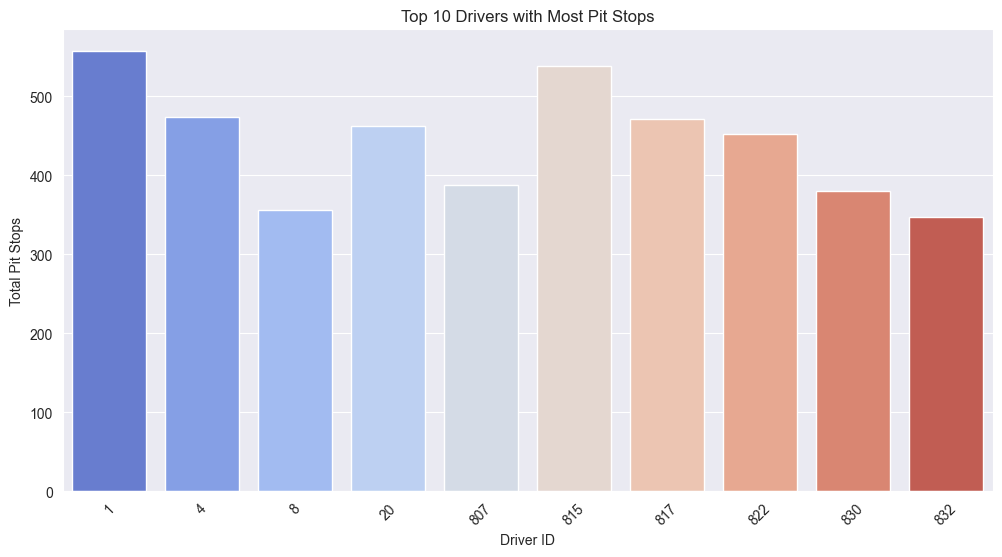

In [17]:
# Pit stops count per driver
pit_stops_per_driver = dataframes['pit_stops'].groupby("driverId")["stop"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=pit_stops_per_driver.index, y=pit_stops_per_driver.values, palette="coolwarm")
plt.title("Top 10 Drivers with Most Pit Stops")
plt.xlabel("Driver ID")
plt.ylabel("Total Pit Stops")
plt.xticks(rotation=45)
plt.show()
